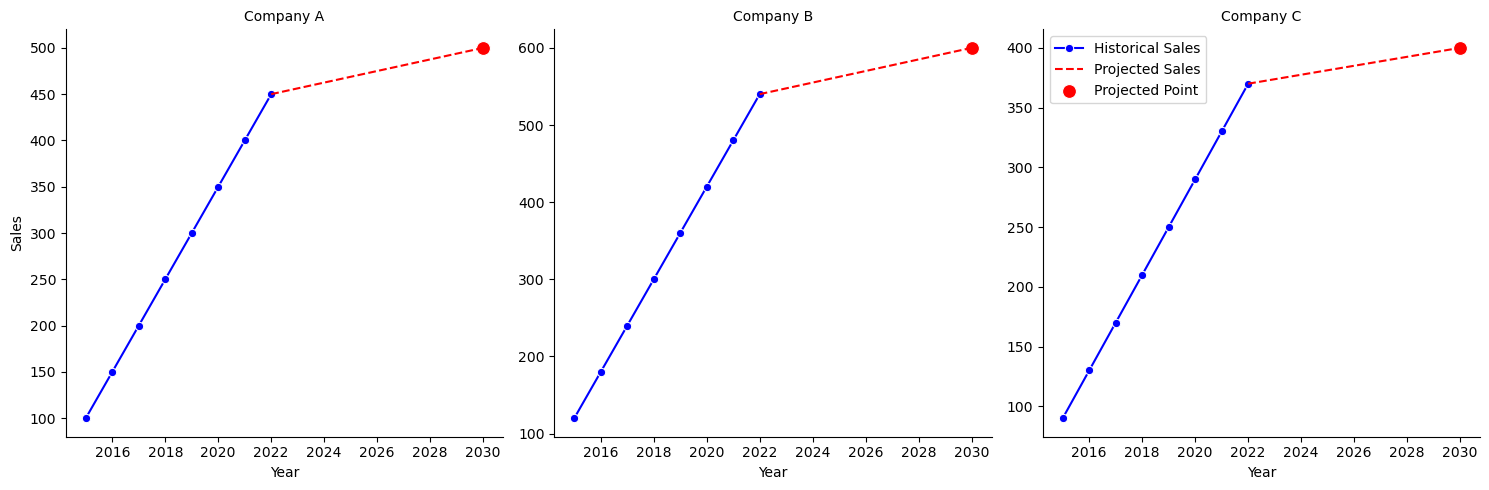

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample dataset
data = {
    'year': list(range(2015, 2023)) * 3 + [2030] * 3,
    'sales': [100, 150, 200, 250, 300, 350, 400, 450] + [120, 180, 240, 300, 360, 420, 480, 540] + [90, 130, 170, 210, 250, 290, 330, 370] + [500, 600, 400],
    'company': ['Company A'] * 8 + ['Company B'] * 8 + ['Company C'] * 8 + ['Company A', 'Company B', 'Company C']
}

df = pd.DataFrame(data)

# Split the data into historical and projected
historical_sales = df[df['year'] < 2030]
projected_sales = df[df['year'] == 2030]

# Initialize a FacetGrid
# g = sns.FacetGrid(historical_sales, col='company', height=5, sharey=False)

# Map a line plot onto the grid for historical sales
g.map_dataframe(sns.lineplot, x='year', y='sales', marker='o', linestyle='-', color='blue', label='Historical Sales')

# Function to add dashed lines from last historical point to projected point
def add_dashed_line(data, **kwargs):
    company = data['company'].iloc[0]
    historical = historical_sales[historical_sales['company'] == company]
    projected = projected_sales[projected_sales['company'] == company]
    plt.plot([historical['year'].iloc[-1], projected['year'].iloc[0]],
             [historical['sales'].iloc[-1], projected['sales'].iloc[0]],
             'r--', label='Projected Sales')

# Add dashed lines connecting the last historical point to the projected point
g.map_dataframe(add_dashed_line, x='year', y='sales')

# Overlay projected sales points with different colors
def add_projected_points(data, **kwargs):
    sns.scatterplot(x='year', y='sales', data=projected_sales[projected_sales['company'] == data['company'].iloc[0]], color='red', s=100, label='Projected Point')

g.map_dataframe(add_projected_points, x='year', y='sales')

# Add legend
# for ax in g.axes.flatten():
#     ax.legend()

g.axes.flatten()[2].legend()

# Customize the plot if necessary (e.g., adding titles, labels)
g.set_axis_labels('Year', 'Sales')
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()


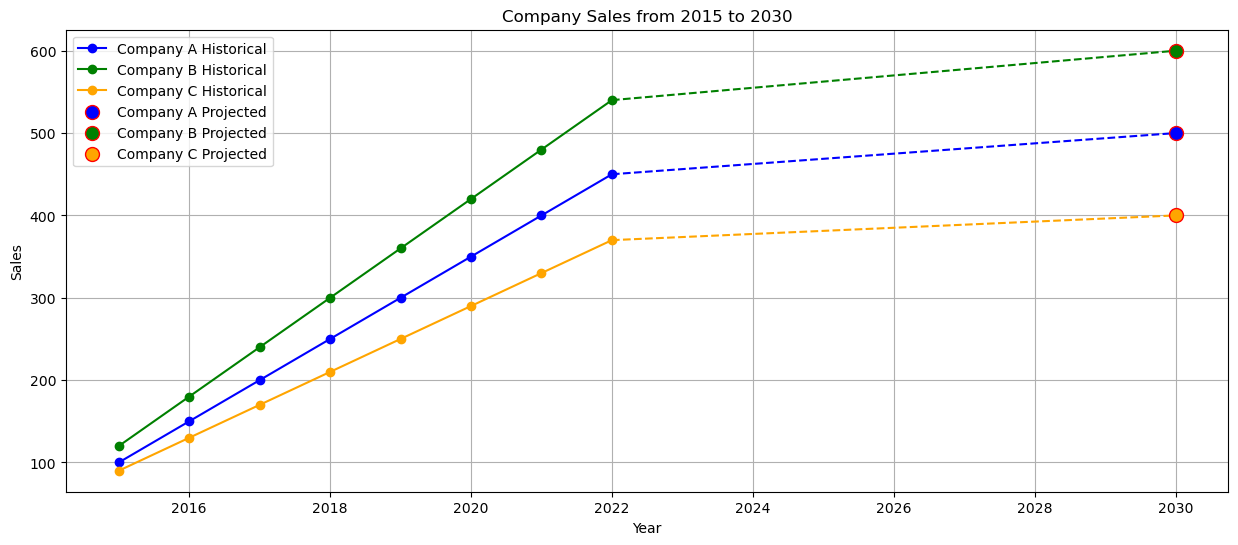

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample dataset
data = {
    'year': list(range(2015, 2023)) * 3 + [2030] * 3,
    'sales': [100, 150, 200, 250, 300, 350, 400, 450] + [120, 180, 240, 300, 360, 420, 480, 540] + [90, 130, 170, 210, 250, 290, 330, 370] + [500, 600, 400],
    'company': ['Company A'] * 8 + ['Company B'] * 8 + ['Company C'] * 8 + ['Company A', 'Company B', 'Company C']
}

df = pd.DataFrame(data)

# Split the data into historical and projected
historical_sales = df[df['year'] < 2030]
projected_sales = df[df['year'] == 2030]

# Initialize the plot
plt.figure(figsize=(15, 6))

# Define colors for the companies
colors = {
    'Company A': 'blue',
    'Company B': 'green',
    'Company C': 'orange'
}

# Plot historical sales data
for company in historical_sales['company'].unique():
    company_data = historical_sales[historical_sales['company'] == company]
    plt.plot(company_data['year'], company_data['sales'], marker='o', linestyle='-', color=colors[company], label=f'{company} Historical')

# Plot projected sales points and dashed lines
for company in projected_sales['company'].unique():
    # Plot projected sales point
    projected_data = projected_sales[projected_sales['company'] == company]
    plt.scatter(projected_data['year'], projected_data['sales'], color=colors[company], s=100, edgecolor='red', zorder=5, label=f'{company} Projected')
    
    # Plot dashed line
    last_historical = historical_sales[historical_sales['company'] == company].iloc[-1]
    plt.plot([last_historical['year'], projected_data['year'].iloc[0]],
             [last_historical['sales'], projected_data['sales'].iloc[0]],
             linestyle='--', color=colors[company]
             )

# Add legend
plt.legend()

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Company Sales from 2015 to 2030')
plt.grid(True)

# Show the plot
plt.show()
